In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
transaction = pd.read_excel("https://insidesherpa.s3.amazonaws.com/vinternships/companyassets/32A6DqtsbF7LbKdcq/QVI_transaction_data.xlsx")
purchase = pd.read_csv("https://insidesherpa.s3.amazonaws.com/vinternships/companyassets/32A6DqtsbF7LbKdcq/QVI_purchase_behaviour.csv")

In [3]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
transaction["PROD_QUANT"]=transaction["PROD_NAME"].apply(lambda x:x[-4:-1])

In [5]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_QUANT
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


In [6]:
transaction["PROD_QUANT"].unique()

array(['175', '170', '150', '300', '330', '210', '270', '220', '125',
       '110', '134', '380', '180', '165', 'Sal', '250', '200', '160',
       '190', ' 90', ' 70'], dtype=object)

In [7]:
transaction[transaction["PROD_QUANT"]=="Sal"].index

Int64Index([    65,    153,    174,    177,    348,    354,    398,    623,
               711,    712,
            ...
            263732, 263950, 264001, 264547, 264561, 264564, 264574, 264725,
            264767, 264823],
           dtype='int64', length=3257)

In [8]:
transaction.PROD_QUANT = transaction.PROD_QUANT.str.replace('Sal','135')

In [9]:
transaction["PROD_QUANT"].unique()

array(['175', '170', '150', '300', '330', '210', '270', '220', '125',
       '110', '134', '380', '180', '165', '135', '250', '200', '160',
       '190', ' 90', ' 70'], dtype=object)

In [10]:
transaction["COMP_NAME"] = transaction.PROD_NAME.str[:-4]

In [11]:
transaction["COMP_NAME"]

0           Natural Chip        Compny SeaSalt
1                         CCs Nacho Cheese    
2           Smiths Crinkle Cut  Chips Chicken 
3           Smiths Chip Thinly  S/Cream&Onion 
4         Kettle Tortilla ChpsHny&Jlpno Chili 
                          ...                 
264831     Kettle Sweet Chilli And Sour Cream 
264832               Tostitos Splash Of  Lime 
264833                    Doritos Mexicana    
264834     Doritos Corn Chip Mexican Jalapeno 
264835               Tostitos Splash Of  Lime 
Name: COMP_NAME, Length: 264836, dtype: object

In [12]:
len(transaction["COMP_NAME"].value_counts())

114

In [13]:
transaction['PROD_NBR'].value_counts()

102    3304
108    3296
33     3269
112    3268
75     3265
       ... 
11     1431
76     1430
98     1419
29     1418
72     1410
Name: PROD_NBR, Length: 114, dtype: int64

In [14]:
transaction["COMP_NAME"] = transaction.PROD_NAME.str.split(' ')

In [15]:
transaction.COMP_NAME = transaction["COMP_NAME"].apply(lambda x:x[0])

In [16]:
transaction["COMP_NAME"].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'Woolworths', 'French', 'RRD', 'Tostitos',
       'Cheetos', 'Snbts', 'Sunbites'], dtype=object)

In [17]:
transaction.PROD_QUANT = transaction.PROD_QUANT.astype(str).astype(int)

In [18]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
 8   PROD_QUANT      264836 non-null  int64  
 9   COMP_NAME       264836 non-null  object 
dtypes: float64(1), int64(7), object(2)
memory usage: 20.2+ MB


In [19]:
df_num = transaction[['STORE_NBR','PROD_NBR','PROD_QTY','PROD_QUANT']]
df_cat = transaction['COMP_NAME']

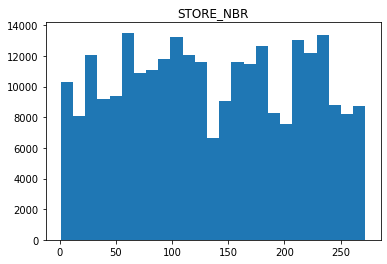

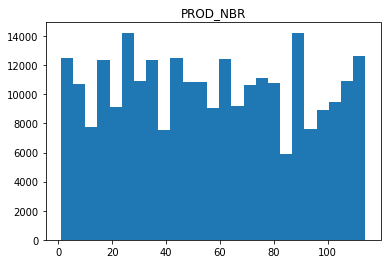

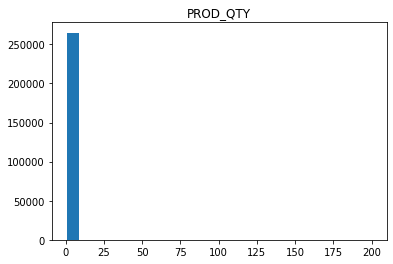

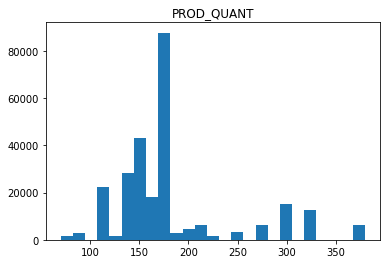

In [20]:
for i in df_num.columns:
    plt.hist(df_num[i],25,)
    plt.title(i)
    plt.show()

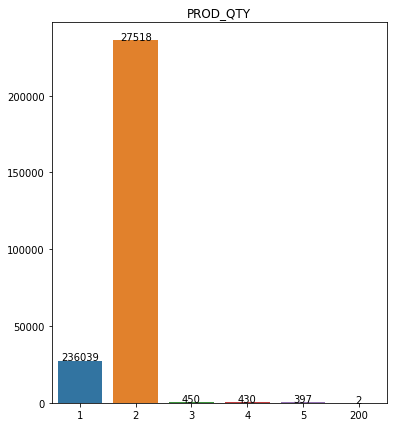

In [21]:
labels=transaction['PROD_QTY'].value_counts().index
values=transaction['PROD_QTY'].value_counts().values

plt.figure(figsize = (6, 7))
plt.title('PROD_QTY')
ax = sns.barplot(x=labels, y=values, errwidth=0.5)
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 1, values[i],ha="center")
   

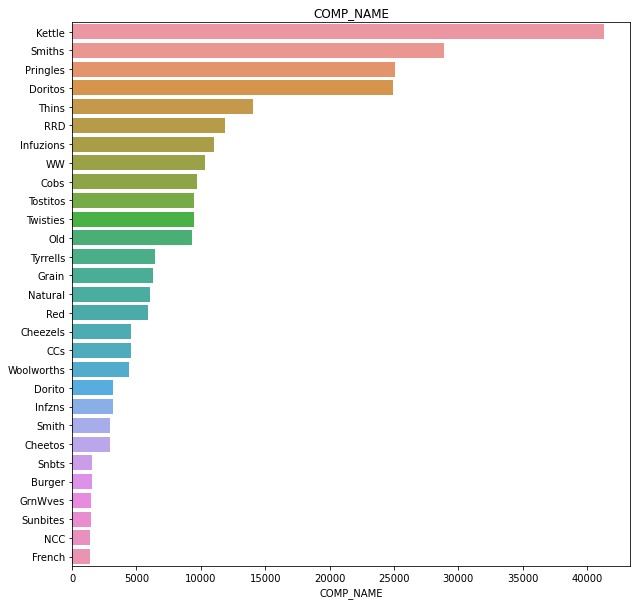

In [22]:
plt.figure(figsize=(10,10))
sns.barplot(transaction['COMP_NAME'].value_counts(),transaction['COMP_NAME'].value_counts().index).set_title('COMP_NAME')
plt.show()

In [23]:
transaction['PROD_QTY'].value_counts()

2      236039
1       27518
5         450
3         430
4         397
200         2
Name: PROD_QTY, dtype: int64

In [24]:
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [25]:
purchase_cat=purchase[['LIFESTAGE','PREMIUM_CUSTOMER']]

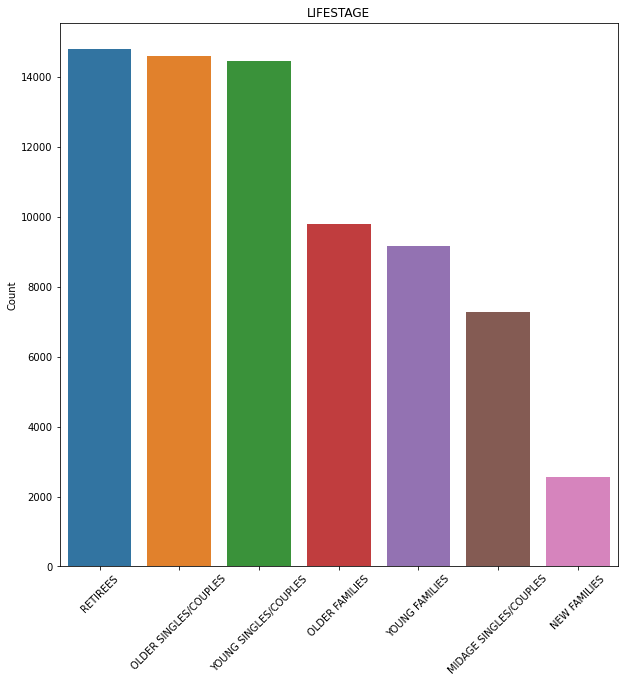

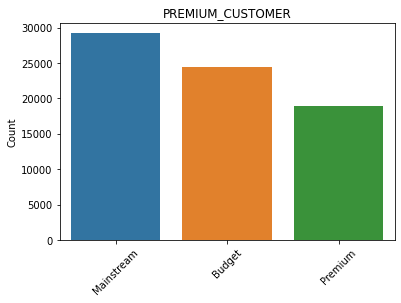

In [26]:
plt.figure(figsize=(10,10))
# chart = sns.countplot(
#     data=data[data['Year'] == 1980],
#     x='Sport',
#     palette='Set1'
# )
for i in purchase_cat.columns:
    chart = sns.barplot(purchase_cat[i].value_counts().index,purchase_cat[i].value_counts())
    chart.set_title(i)
    chart.set_ylabel('Count')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    plt.show()
    

In [27]:
all_data = pd.merge(transaction,purchase,how='outer',left_on='LYLTY_CARD_NBR',right_on='LYLTY_CARD_NBR')

In [28]:
all_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_QUANT,COMP_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,43414,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160,WW,MIDAGE SINGLES/COUPLES,Budget
3,43533,1,1307,347,54,CCs Original 175g,1,2.1,175,CCs,MIDAGE SINGLES/COUPLES,Budget
4,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,Kettle,YOUNG SINGLES/COUPLES,Premium
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,Tostitos,YOUNG SINGLES/COUPLES,Premium
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,Doritos,YOUNG SINGLES/COUPLES,Premium
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,Doritos,YOUNG SINGLES/COUPLES,Premium


In [29]:
null_check = all_data.isna()

In [30]:
for i in null_check.columns:
  a = null_check[i].value_counts()
  print(a)

False    264836
Name: DATE, dtype: int64
False    264836
Name: STORE_NBR, dtype: int64
False    264836
Name: LYLTY_CARD_NBR, dtype: int64
False    264836
Name: TXN_ID, dtype: int64
False    264836
Name: PROD_NBR, dtype: int64
False    264836
Name: PROD_NAME, dtype: int64
False    264836
Name: PROD_QTY, dtype: int64
False    264836
Name: TOT_SALES, dtype: int64
False    264836
Name: PROD_QUANT, dtype: int64
False    264836
Name: COMP_NAME, dtype: int64
False    264836
Name: LIFESTAGE, dtype: int64
False    264836
Name: PREMIUM_CUSTOMER, dtype: int64
